# A rank of the influence of nations through exports and imports

## By Jonah Heyl


###  Set up:

In [11]:
import os
try:
    import requests as rq
except:
    os.system("pip install requests")
    import requests as rq
try:
    import json
except:
    os.system("pip install json")
    import json
try:
    import numpy as np
except:
    os.system("pip install numpy")
    import numpy as np
try:
    import pandas as pd
except:
    os.system("pip install pandas")
    import pandas as pd


In [12]:
np.random.seed(1234)
wto_data = pd.read_csv('wto.csv')

In [13]:
wto_yearly_dic={}
for year in wto_data["year"]:
    wto_yearly_dic[year]=[]

In [14]:
for index in range(0,len(wto_data)-1):
    temp=wto_data.iloc[index]
    temp_dic={"exporter":temp["exporter"],"importer":temp["importer"],"trade":temp["trade"]}
    wto_yearly_dic[temp["year"]].append(temp_dic)

In [15]:
jj=json.dumps(wto_yearly_dic)
with open("wto.json","w") as f:
    f.write(jj)

In [16]:
wto_data[1:5]

,pair_id,year,exporter,importer,trade
1,230,1980,AFG,AUT,519427.470
2,235,1980,AFG,BGD,27231.648
3,241,1980,AFG,BLX,419159.750
4,251,1980,AFG,CAN,66580.422


In [17]:
l=wto_data["exporter"]+wto_data["importer"]
u= lambda x:  [i for n, i in enumerate(x) if i not in x[:n]]

In [18]:
list_all_contries=u(l)

In [19]:
try:
    import networkx as nx
except:
    os.system("pip install networkx")
    import networkx as nx

This next cell makes a dirrected wieghted graph of all the placements

### Createing the dirrected graph:

In [20]:
def build_dic_graph(year,export_good=True,all_contries=list_all_contries,dic=wto_yearly_dic):
    DG = nx.DiGraph()
    DG.add_nodes_from(all_contries)
    if export_good:
        for deal in wto_yearly_dic[year]:
            DG.add_weighted_edges_from([(deal["importer"], deal['exporter'],deal['trade'])]) 
        return DG
    for deal in wto_yearly_dic[year]:
            DG.add_weighted_edges_from([( deal['exporter'],deal["importer"],deal['trade'])]) 
    return DG

# Google Page Rank Algorithim

Here we use the google page rank algorithim to rank all of the countries, based on the imports or exports of that country with other countries. We will have two versions of the rank on with exports and the other with imports.

In [21]:
from networkx import pagerank 

In [22]:
DG=build_dic_graph(2016,False,list_all_contries,wto_yearly_dic)
pr=nx.pagerank(DG) #https://networkx.guide/algorithms/link-analysis/pagerank/

In [23]:
marklist = sorted(pr.items(), key=lambda x:-x[1])
s = dict(marklist)
newdict={}
for key in s:
    if type(key) is str:
        newdict[key]=s[key]
    else:
        newdict[key[0]]=s[key]

        


In [24]:
marklist

[('USA', 0.00035362040773916076),
 ('ARE', 0.0002231443229352175),
 ('CHN', 0.0001654347547563688),
 ('FRA', 0.0001602663648211583),
 ('DEU', 0.00015576893132177296),
 ('CHE', 0.0001417294576582863),
 ('IND', 0.0001188233983441885),
 ('GBR', 0.00011185493437975322),
 ('ITA', 0.00011099547160797697),
 ('ZAF', 0.0001023919698002856),
 ('NLD', 9.360741658376376e-05),
 ('ESP', 9.175064078724964e-05),
 ('POL', 9.15770455158249e-05),
 ('BLX', 8.522080018543336e-05),
 ('KOR', 8.409838520195743e-05),
 ('AUS', 7.610122185028808e-05),
 ('TUR', 7.430292116561851e-05),
 ('HKG', 6.862189039211726e-05),
 ('RUS', 6.779258919457262e-05),
 ('JPN', 6.752337994381237e-05),
 ('THA', 6.575115644375231e-05),
 ('CAN', 6.28112026039208e-05),
 ('BRA', 6.245575699941004e-05),
 ('GRC', 6.203535994144557e-05),
 ('MYS', 6.118471603700163e-05),
 ('SGP', 6.0622265308847974e-05),
 ('MEX', 5.960006350427912e-05),
 ('IDN', 5.77048517587236e-05),
 ('SAU', 5.718836230716694e-05),
 ('COL', 5.284118488436891e-05),
 ('PHL',

In [25]:
for ii,key in enumerate(s):
    if ii>100:
        break
    print(ii+1,key,s[key])

1 USA 0.00035362040773916076
2 ARE 0.0002231443229352175
3 CHN 0.0001654347547563688
4 FRA 0.0001602663648211583
5 DEU 0.00015576893132177296
6 CHE 0.0001417294576582863
7 IND 0.0001188233983441885
8 GBR 0.00011185493437975322
9 ITA 0.00011099547160797697
10 ZAF 0.0001023919698002856
11 NLD 9.360741658376376e-05
12 ESP 9.175064078724964e-05
13 POL 9.15770455158249e-05
14 BLX 8.522080018543336e-05
15 KOR 8.409838520195743e-05
16 AUS 7.610122185028808e-05
17 TUR 7.430292116561851e-05
18 HKG 6.862189039211726e-05
19 RUS 6.779258919457262e-05
20 JPN 6.752337994381237e-05
21 THA 6.575115644375231e-05
22 CAN 6.28112026039208e-05
23 BRA 6.245575699941004e-05
24 GRC 6.203535994144557e-05
25 MYS 6.118471603700163e-05
26 SGP 6.0622265308847974e-05
27 MEX 5.960006350427912e-05
28 IDN 5.77048517587236e-05
29 SAU 5.718836230716694e-05
30 COL 5.284118488436891e-05
31 PHL 5.187932660471982e-05
32 DNK 5.16395448860533e-05
33 CZE 5.160637836210087e-05
34 ISR 5.0803940369284274e-05
35 NOR 4.649551617352

In [26]:
for ii,key in enumerate(newdict):
    if ii>5:
        break
    print(key,newdict[key])

USA 0.00035362040773916076
ARE 0.0002231443229352175
CHN 0.0001654347547563688
FRA 0.0001602663648211583
DEU 0.00015576893132177296
CHE 0.0001417294576582863


In [27]:
#li=list(s) #this saves the ranking
jj= json.dumps(newdict)
with open("google_rank4.json","w") as f:
    f.write(jj)


In [28]:
wto_data

,pair_id,year,exporter,importer,trade
0,229,1980,AFG,AUS,9.395864e+05
1,230,1980,AFG,AUT,5.194275e+05
2,235,1980,AFG,BGD,2.723165e+04
3,241,1980,AFG,BLX,4.191598e+05
4,251,1980,AFG,CAN,6.658042e+04
...,...,...,...,...,...
972687,24743,2016,ZWE,UKR,4.521700e+04
972688,24776,2016,ZWE,USA,6.543986e+06
972689,24868,2016,ZWE,ZAF,1.011946e+09
972690,24870,2016,ZWE,ZAR,6.483500e+04


# China's influence overtime 

In [33]:
wto_nation_dic={}

In [22]:
china=[]
usa=[]
uk=[]
for i in range(2000,2016):
    DG=build_dic_graph(i,True,list_all_contries,wto_yearly_dic)
    pr=nx.pagerank(DG) 
    china.append(pr["CHN"])
    usa.append(pr["USA"])
    uk.append(pr["GBR"])

In [34]:
for i in range(1980,2016):
    DG=build_dic_graph(i,True,list_all_contries,wto_yearly_dic)
    pr=nx.pagerank(DG)
    for key,value in pr.items():
        try:
            wto_nation_dic[key].append(value)
        except:
            wto_nation_dic[key]=[]
            wto_nation_dic[key].append(value)


In [38]:
jj=json.dumps(wto_nation_dic)
with open("wto.json","w") as f:
    f.write(jj)

In [39]:
import matplotlib.pyplot as plt

In [40]:
#dates=np.array([datetime.datetime(2000, 1, i+1) for i in range(16)])
dates=range(1980,2016)

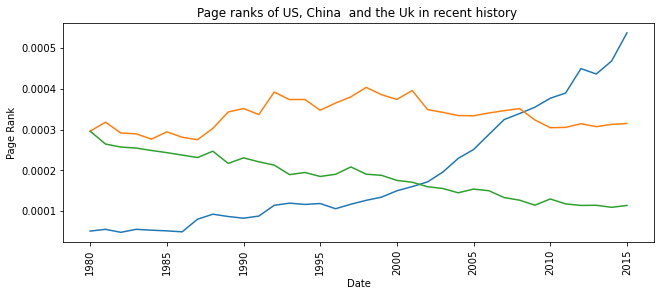

In [42]:
fig, ax = plt.subplots()
ax.plot(dates,wto_nation_dic["CHN"])
ax.ticklabel_format(style='plain')
plt.xlabel("Date")
plt.ylabel("Page Rank")
plt.title("Page ranks of US, China  and the Uk in recent history ")
plt.plot(dates,wto_nation_dic["USA"])
plt.plot(dates,wto_nation_dic["GBR"])


In [ ]:
fig, ax = plt.subplots()
ax.plot(dates,wto_nation_dic["CHN"])
ax.ticklabel_format(style='plain')
plt.xlabel("Date")
plt.ylabel("Page Rank")
for key in wto_nation_dic:
    try:
        plt.plot(dates,wto_nation_dic[key]) #for nans
    except:
        pass
plt.tight_layout()
plt.tick_params(axis='x', rotation=90)
fig.set_figwidth(20)
fig.set_figwidth(10)
plt.show()